# Beta Binomial sample using Gibbs sampeling


$p \sim Beta(\alpha,\beta)$ and $X\sim Bino(N,p)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## variables
SAMPLE_SIZE = 100_000
N = 10
ALPHA = 7
BETA = 2

t_mean = (N * ALPHA) / (ALPHA + BETA)
t_variance = ((N * ALPHA * BETA) / (ALPHA + BETA) ** 2) * (
    (ALPHA + BETA + N) / (ALPHA + BETA + 1)
)
print(f"Theoritical\nMean: {t_mean}\nVariance: {t_variance}")

Theoritical
Mean: 7.777777777777778
Variance: 3.28395061728395


In [3]:
sample = [[np.random.beta(ALPHA, BETA)], []]
for _ in range(SAMPLE_SIZE):
    current_p = sample[0][-1]
    new_x = np.random.binomial(N, current_p)
    new_p = np.random.beta(ALPHA, BETA)
    sample[0].append(new_p)
    sample[1].append(new_x)

sample

[[0.8098914743877169,
  0.7311987635702174,
  0.8742009583256328,
  0.8839539382257813,
  0.7859442780592415,
  0.9307079414560115,
  0.8473415900018377,
  0.8947214003932772,
  0.7846109546502333,
  0.7566662873619694,
  0.49441367082973414,
  0.83401149917325,
  0.8907065351627349,
  0.8335532320096046,
  0.646084783798671,
  0.6967087173214578,
  0.8233289686367549,
  0.8310305881724112,
  0.633508149747734,
  0.9447226957213554,
  0.7459992753560638,
  0.8888373251166061,
  0.8639798886082551,
  0.8056620309775968,
  0.8334996981780418,
  0.9391391738241804,
  0.693602854063503,
  0.8246264457462594,
  0.7700899808216629,
  0.8367094690182352,
  0.8093214836974931,
  0.5483563926723816,
  0.9523477182072985,
  0.7063204935854575,
  0.34651957287262214,
  0.5880581111114512,
  0.7269607408891511,
  0.6325127526668246,
  0.5580562340893368,
  0.5203867688801258,
  0.7253601991382688,
  0.6997337281958905,
  0.6463736996427728,
  0.8765250715679687,
  0.7924506024915169,
  0.689890671

In [4]:
np.mean(sample[1])

7.78418

In [5]:
np.var(sample[1])

3.2726817276000006

Text(0.5, 0, 'samples')

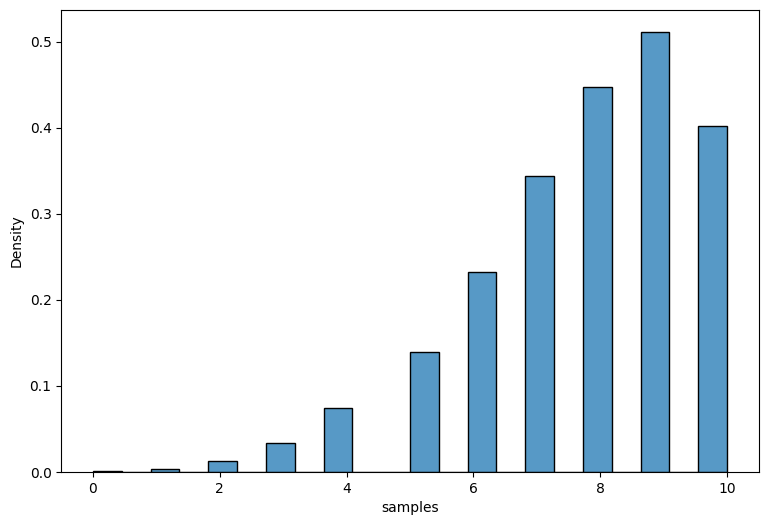

In [7]:
plt.figure(figsize=(9, 6))
sns.histplot(sample[1],bins=22, stat="density")
plt.xlabel("samples")